In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [197]:
activity_data=pd.read_csv(r"C:\Users\ReerGlobal\Desktop\Business_Intelligence_Project\ActivityData.csv", header=None)
subscribers_data=pd.read_csv(r"C:\Users\ReerGlobal\Desktop\Business_Intelligence_Project\SubscribersData.csv")
# print(activity_data.shape)  # This will give you the number of rows and columns
# print(activity_data.head())  # This will show you the first few rows of the DataFrame
activity_data.columns = ['PhoneNumber-SubscriberIdentityNumber', 'Duration', 'Activity', 'ErrorCode']
# print(activity_data.columns)

In [198]:
activity_data.columns = ['PhoneNumber-SubscriberIdentityNumber', 'Duration', 'Activity', 'ErrorCode']

In [199]:
print("First 10 rows of ActivityData:")
print(activity_data.head(10))
print("\nFirst 10 rows of SubscribersData:")
print(subscribers_data.head(10))

First 10 rows of ActivityData:
  PhoneNumber-SubscriberIdentityNumber  Duration        Activity ErrorCode
0           1654788999-345278656547333       2.0     Phone Call-       NaN
1           1888777222-345278666547334       0.0            SMS-         Y
2           1122765445-345278676547335      10.0  Internet Data-       NaN
3           1356753668-345278686547336       1.0  Phone Call-111       NaN
4           1590741891-345278696547337       2.0  Phone Call-111       NaN
5           1824730114-345278706547338       3.0  Phone Call-111       NaN
6           1058718337-345278716547339       4.0  Phone Call-111       NaN
7           1292706560-345278726547340       5.0     Phone Call-       NaN
8           1526694783-345278736547341      12.0     Phone Call-       NaN
9           1526694784-345278746547342      11.0     Phone Call-       NaN

First 10 rows of SubscribersData:
   SubscriberIdentityNumber  Phone Number Subscriber Name        SSN  \
0           345278656547333    165478

In [200]:
print("\nShape of ActivityData:", activity_data.shape)
print("Shape of SubscribersData:", subscribers_data.shape)


Shape of ActivityData: (1000, 4)
Shape of SubscribersData: (505, 11)


In [201]:
print("\nNull values in ActivityData:\n", activity_data.isnull().sum())
print("Null values in SubscribersData:\n", subscribers_data.isnull().sum())


Null values in ActivityData:
 PhoneNumber-SubscriberIdentityNumber      0
Duration                                  0
Activity                                  0
ErrorCode                               980
dtype: int64
Null values in SubscribersData:
 SubscriberIdentityNumber    0
Phone Number                0
Subscriber Name             0
SSN                         0
Subscriber Age              0
State                       0
Zip Code                    0
SubscribedFromDate          0
Internet Service            0
SMS Service                 4
Churn Status                6
dtype: int64


In [202]:
print("\nCentral tendency measures in ActivityData:\n", activity_data.describe())
print("\nCentral tendency measures in SubscribersData:\n", subscribers_data.describe())


Central tendency measures in ActivityData:
           Duration
count  1000.000000
mean      9.541200
std      13.188744
min       0.000000
25%       1.000000
50%      10.000000
75%      14.000000
max     120.000000

Central tendency measures in SubscribersData:
        SubscriberIdentityNumber  Phone Number           SSN  Subscriber Age  \
count              5.050000e+02  5.050000e+02  5.050000e+02      505.000000   
mean               3.452812e+14  1.513510e+09  2.144491e+08       38.572277   
std                1.458411e+09  1.396134e+08  1.458410e+02       14.192946   
min                3.452787e+14  1.000000e+01  2.144489e+08       15.000000   
25%                3.452799e+14  1.526695e+09  2.144490e+08       30.000000   
50%                3.452812e+14  1.526695e+09  2.144491e+08       36.000000   
75%                3.452824e+14  1.526695e+09  2.144493e+08       44.000000   
max                3.452836e+14  1.888777e+09  2.144494e+08       78.000000   

           Zip Code  
co

In [203]:
activity_data.fillna(activity_data.select_dtypes(include=[np.number]).mean(), inplace=True)
subscribers_data.fillna(subscribers_data.select_dtypes(include=[np.number]).mean(), inplace=True)

In [204]:
z_scores_activity = np.abs(zscore(activity_data.select_dtypes(include=[np.number])))
activity_data = activity_data[(z_scores_activity < 3).all(axis=1)]
z_scores_subscribers = np.abs(zscore(subscribers_data.select_dtypes(include=[np.number])))
subscribers_data = subscribers_data[(z_scores_subscribers < 3).all(axis=1)]

In [205]:
activity_data.drop_duplicates(inplace=True)
subscribers_data.drop_duplicates(inplace=True)

In [206]:
print("\nFinal shape of ActivityData:", activity_data.shape)
print("Final shape of SubscribersData:", subscribers_data.shape)


Final shape of ActivityData: (512, 4)
Final shape of SubscribersData: (495, 11)


In [207]:
activity_data.to_csv("Preprocessed_ActivityData.csv", index=False)
subscribers_data.to_csv("Preprocessed_SubscribersData.csv", index=False)

In [208]:
print(activity_data.columns)

Index(['PhoneNumber-SubscriberIdentityNumber', 'Duration', 'Activity',
       'ErrorCode'],
      dtype='object')


In [209]:
activity_data[['PhoneNumber', 'Subscriber Identity Number']] = activity_data['PhoneNumber-SubscriberIdentityNumber'].str.split('-', expand=True)

In [210]:
activity_data['Error Code'] = activity_data['ErrorCode'].fillna(0) 

In [211]:
activity_data.drop(['PhoneNumber-SubscriberIdentityNumber', 'ErrorCode'], axis=1, inplace=True)

In [212]:
print("\nFormatted ActivityData (first 10 rows):")
print(activity_data.head(10))


Formatted ActivityData (first 10 rows):
   Duration        Activity PhoneNumber Subscriber Identity Number Error Code
0       2.0     Phone Call-  1654788999            345278656547333          0
1       0.0            SMS-  1888777222            345278666547334          Y
2      10.0  Internet Data-  1122765445            345278676547335          0
3       1.0  Phone Call-111  1356753668            345278686547336          0
4       2.0  Phone Call-111  1590741891            345278696547337          0
5       3.0  Phone Call-111  1824730114            345278706547338          0
6       4.0  Phone Call-111  1058718337            345278716547339          0
7       5.0     Phone Call-  1292706560            345278726547340          0
8      12.0     Phone Call-  1526694783            345278736547341          0
9      11.0     Phone Call-  1526694784            345278746547342          0


In [213]:
print("\nNull values in formatted ActivityData:\n", activity_data.isnull().sum())


Null values in formatted ActivityData:
 Duration                      0
Activity                      0
PhoneNumber                   0
Subscriber Identity Number    0
Error Code                    0
dtype: int64


In [214]:
activity_data.loc[:, 'Error Code'] = activity_data['Error Code'].fillna(0)

In [215]:
print(activity_data['Duration'].unique())

[ 2.   0.  10.   1.   3.   4.   5.  12.  11.  22.  25.   8.   7.   9.
  3.6  3.5  3.2  3.1  4.2  4.3  4.5 15.  18.  13.  14.  16.  17.  19.
 20. ]


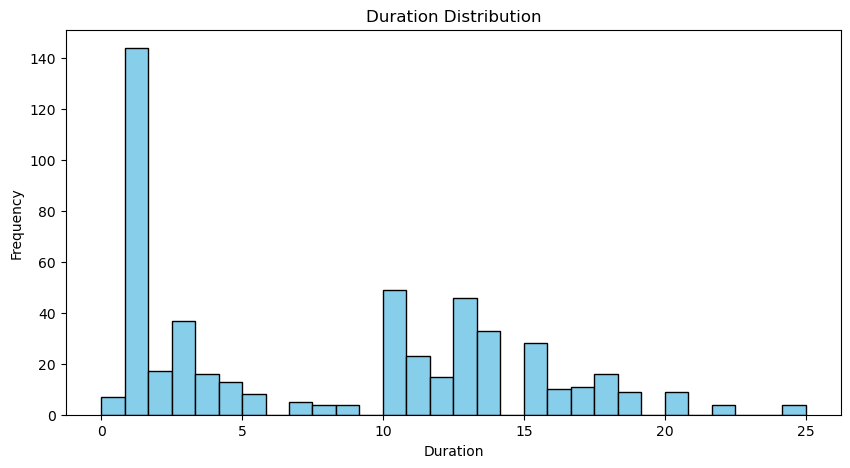

In [216]:
plt.figure(figsize=(10, 5))
plt.hist(activity_data['Duration'], bins=30, color='skyblue', edgecolor='black')
plt.title("Duration Distribution")
plt.xlabel("Duration")
plt.ylabel("Frequency")
plt.show()

In [217]:
activity_data.to_csv("Formatted_ActivityData.csv", index=False)